# Dell.com Customer Recommendation System
### By Rich Caputo

#### Problem Statement: When a customer logs into Dell.com, the front page remains the same as if they had not logged in, essentially treating an account holding customer the same as if they were new to the website, without any personalization. According to McKinsey, "Already, 35 percent of what consumers purchase on Amazon and 75 percent of what they watch on Netflix come from product recommendations based on such [recommendation] algorithms." https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers.

My goal is to create a recommendation system on Dell.com using Python that understands and tailors specifically to the individuality of each of our account holding customers. If we were to have recommendations for an account holding customer based on machine learning methods, we would not only potentially increase sales, but also increase our brand reputation as one that is integrated firmly in the AI/ML world. Using data on how much of any given item every customer has purchased on our website, we can predict what it will be that a customer most likely will buy next.

The following Jupyter notebook is a simulation as to how a Dell.com recommendation system might work. We use simulated data that is segmented into four possible customer categories that may well be similar to our actual customer base: enthusiast, business, home office, and gaming. Although the data we create cannot fully accurately represent the Dell customer base, this will help us understand how useful a recommendation system can be. If we were to implement this model, the data would speak for itself, i.e. we would be able to find segments rather than create them ourselves.

In [1]:
# Implement Relevant Packages
import random
import sys

# Store data as dataframes and perform operations
import pandas as pd
import numpy as np

# Machine learning repository
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Scipy
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve

# Allows the use of display() for DataFrames
from IPython.display import display 

# Import supplementary visualizations code visuals.py
import visuals as vs


Let's now import a list of almost every item offered on Dell.com. We will deliberately leave out some items for convenience sake, but this list will contain nearly the top 80% of what we offer. 

In [2]:

# Input all possible products on Dell.com
products = ['Latitude 3000', 'Latitude 5000', 'Latitude 7000', 'Latitude Education Series', 'Latitude Rugged Series', 'Vostro 3000', 'Vostro 5000',\
            'Inspiron 3000', 'Inspriron 5000', 'Inspriron 7000', 'Inspiron Chromebook 11', 'Precision Mobile Workstation 3000',\
            'Precision Mobile Workstation 5000', 'Precision Mobile Workstation 7000', 'XPS 13', 'XPS 13 2-in-1', 'XPS 15', 'XPS 15 2-in-1',\
            'Education Chromebook 11', 'Education Chromebook 13', 'G3', 'G5', 'G7', 'OptiPlex 3000', 'OptiPlex 5000', 'OptiPlex 7000',\
            'OptiPlex 3000 All-in-one', 'OptiPlex 5000 All-in-one', 'OptiPlex 7000 All-in-one', 'OptiPlex XE', 'Vostro Desktop',\
            'Inspiron Desktop', 'Inspirion 3000 All-in-one', 'Inspirion 5000 All-in-one', 'Inspirion 7000 All-in-one', 'Precision Fixed 3000',\
            'Precision Fixed 5000', 'Precision Fixed 5000 All-in-one', 'Precision Fixed 7000', 'XPS Tower', 'XPS 27 All-in-one', 'Wyse 3030 Thin Client',\
            'Wyse 3040 Thin Client', 'Wyse 5000 Thin Client', 'Wyse 5070 Thin Client', 'Wyse 7000 Thin Client', 'Wyse 7040 Thin Client', 'Wyse 5030 Zero Client',\
            'Wyse 7030 Zero Client', 'PowerEdge T', 'PowerEdge R', 'PowerEdge C', 'PowerEdge M', 'PowerEdge FX', 'PowerEdge MX', 'PowerEdge VRTX', 'KVM', 'KMM', 'UPS',\
            'Networking X', 'Networking N', 'Networking C', 'Networking S', 'Networking Z', 'Networking M Blade', 'Brocade', 'SonicWall', 'SonicPoint',\
            'UltraSharp 24', 'UltraSharp 27', 'UltraSharp 38 Curved', 'UltraSharp 34 Curved', 'UltraSharp 32 8K', 'UltraSharp 27 4K',\
            '27 P', '22 P', '24 P', '23 P', '24 4K P', '24 Touch P', '24 Video-Conferencing P', '24 E', '17 E', '22 E', '23 E', '70 C', '55 C', '55 C Interactive',\
            '86 Interactive Touch', 'Inkjet Printer', 'Color Laser Printer', 'Black/White Laser Printer', 'Scanner', 'Keys-To-Go', 'Dell Wireless Keyboard & Mouse',\
            'Visiontek Universal Dock', 'Dell Docking Station', 'Dell Business Dock', 'Dell Mobile USB-C Adapter', 'Briefcase', 'Backpack', 'Notebook Sleeve',\
            'Alienware 13', 'Alienware 15', 'Alienware 17', 'Inspiron Gaming Desktop', 'Alienware Aurora', 'Alienware Area-51', 'Alienware 34 Curved Gaming Monitor', 'Dell 27 Gaming Monitor',\
            'Alienware 25 Gaming Monitor', 'HTC Hive', 'Alienware headset', 'Gaming Keyboard', 'Alienware Mouse']

That's a lot of products (115 to be exact)! Now, it's safe for us to assume that not every customer is going to be interested in every item on that list. However, certain customers are definitely going to be interested in certain subsets of this list. For this reason, we will manually create the previously mentioned customer segments, such that each customer will only be interested in a subset of products. 

In [3]:
# Segment into hypothesized customer types
segments = {'Enthusiast': ['Latitude 3000', 'Latitude 5000', 'Latitude 7000', 'Latitude Education Series', 'Latitude Rugged Series', 'Vostro 3000', 'Vostro 5000',\
            'Inspiron 3000', 'Inspriron 5000', 'Inspriron 7000', 'Inspiron Chromebook 11', 'Precision Mobile Workstation 3000', \
            'Precision Mobile Workstation 5000', 'Precision Mobile Workstation 7000', 'XPS 13', 'XPS 13 2-in-1', 'XPS 15', 'XPS 15 2-in-1',\
            'Education Chromebook 11', 'Education Chromebook 13', '27 P', '22 P', '24 P', '23 P', '24 4K P', '24 Touch P', 'Dell Mobile USB-C Adapter', 'Briefcase', 'Backpack', 'Notebook Sleeve', 'Keys-To-Go'],\

            'Business': ['OptiPlex 3000', 'OptiPlex 5000', 'OptiPlex 7000',\
            'OptiPlex 3000 All-in-one', 'OptiPlex 5000 All-in-one', 'OptiPlex 7000 All-in-one', 'OptiPlex XE', 'Vostro Desktop',\
            'Inspiron Desktop', 'Inspirion 3000 All-in-one', 'Inspirion 5000 All-in-one', 'Inspirion 7000 All-in-one', 'Precision Fixed 3000',\
            'Precision Fixed 5000', 'Precision Fixed 5000 All-in-one', 'Precision Fixed 7000', 'XPS Tower', 'XPS 27 All-in-one', 'Wyse 3030 Thin Client',\
            'Wyse 3040 Thin Client', 'Wyse 5000 Thin Client', 'Wyse 5070 Thin Client', 'Wyse 7000 Thin Client', 'Wyse 7040 Thin Client', 'Wyse 5030 Zero Client',\
            'Wyse 7030 Zero Client', 'PowerEdge T', 'PowerEdge R', 'PowerEdge C', 'PowerEdge M', 'PowerEdge FX', 'PowerEdge MX', 'PowerEdge VRTX', 'KVM', 'KMM', 'UPS',\
            'Networking X', 'Networking N', 'Networking C', 'Networking S', 'Networking Z', 'Networking M Blade', 'Brocade', 'SonicWall', 'SonicPoint', 'Dell Business Dock', 'Dell Wireless Keyboard & Mouse'],\
            
            'Home_Office': ['UltraSharp 24', 'UltraSharp 27', 'UltraSharp 38 Curved', 'UltraSharp 34 Curved', 'UltraSharp 32 8K', 'UltraSharp 27 4K',\
            '27 P', '22 P', '24 P', '23 P', '24 4K P', '24 Touch P', '24 Video-Conferencing P', '24 E', '17 E', '22 E', '23 E', '70 C', '55 C', '55 C Interactive',\
            '86 Interactive Touch', 'Inkjet Printer', 'Dell Wireless Keyboard & Mouse', 'Vostro Desktop',\
            'Inspiron Desktop', 'Inspirion 3000 All-in-one', 'Inspirion 5000 All-in-one', 'Inspirion 7000 All-in-one', 'Precision Fixed 3000',\
            'Precision Fixed 5000', 'Precision Fixed 5000 All-in-one', 'Precision Fixed 7000', 'XPS Tower', 'XPS 27 All-in-one', 'Dell Docking Station', 'Dell Business Dock'],\
                            
            'Gaming': ['G3', 'G5', 'G7','Visiontek Universal Dock', 'Dell Docking Station', 'Dell Business Dock', 'Dell Mobile USB-C Adapter', 'Briefcase', 'Backpack', 'Notebook Sleeve',\
            'Alienware 13', 'Alienware 15', 'Alienware 17', 'Inspiron Gaming Desktop', 'Alienware Aurora', 'Alienware Area-51', 'Alienware 34 Curved Gaming Monitor', 'Dell 27 Gaming Monitor',\
            'Alienware 25 Gaming Monitor', 'HTC Hive', 'Alienware headset', 'Gaming Keyboard', 'Alienware Mouse','UltraSharp 24', 'UltraSharp 27', 'UltraSharp 38 Curved', 'UltraSharp 34 Curved', 'UltraSharp 32 8K', 'UltraSharp 27 4K']}


Let's now simulate some data using these segments. We are going to make some hypothetic assumptions: enthusiast and gaming segments are only interested in buying one of any item, business segment will be interested in purchasing up to four of any given item, and home office will sometimes purchase 2 of a given item. These aren't necessarily accurate assumptions, but will help in creating a simple random dataset. Futhermore, we will assume that the number of each segment is ordered from most to least as follows: enthusiast, home_office, gaming, businesss. This is completely speculative and just meant to give some discrepancy in the data.

In [4]:
# Get the number of items in each segment
lengths = []        
for key,value in segments.items():
    lengths.append(len(value))

# Build random dataframes based on each customer type
def build_df():
    # Enthusiast Given 15% chance of buying one of random item and 5% chance of buying 2 of random item
    enthusiast = np.random.choice([0, 1, 2], size=(5000,lengths[0]), p=[8./10, 1.5/10, 0.5/10])
    enthusiast_df = pd.DataFrame(enthusiast, columns=segments['Enthusiast'])
    for item in list(set(products)-set(segments['Enthusiast'])):
        enthusiast_df[item]=0
    
    # Business given pseudo-normal distribution over range of 0 to 4 of any given random item
    business = np.random.choice([0, 1, 2, 3, 4], size=(1000,lengths[1]), p=[1./10, 2./10, 4./10, 2./10, 1./10])
    business_df = pd.DataFrame(business, columns=segments['Business'])
    for item in list(set(products)-set(segments['Business'])):
        business_df[item]=0
    
    # Home Office given 15% chance of buying one of random item and 5% chance of buying 2 of random item
    home_office = np.random.choice([0, 1, 2], size=(3000,lengths[2]), p=[8./10, 1.5/10, 0.5/10])
    home_office_df = pd.DataFrame(home_office, columns=segments['Home_Office'])
    for item in list(set(products)-set(segments['Home_Office'])):
        home_office_df[item]=0
    
    # Gaming given 10% chance of buying any random item in segment (gaming items are more expensive than hobbyist items)
    gaming = np.random.choice([0, 1], size=(1500,lengths[3]), p=[9./10, 1./10])
    gaming_df = pd.DataFrame(gaming, columns=segments['Gaming'])
    for item in list(set(products)-set(segments['Gaming'])):
        gaming_df[item]=0
    
    # Put all our data together
    big_df = pd.concat([enthusiast_df, business_df, home_office_df, gaming_df], sort=True)
    
    # Add some random noise (fixes for segmented customers that may buy items from other segment)
    big_df.add(np.random.choice([0, 1], size=big_df.shape, p=[8./10, 2./10]))
    
    # Output final dataframe
    return big_df

df = build_df()

# Choose some samples from each segment to visualize later
# In order enthusiast, business, home office, gaming
samples = df.iloc[[3,5500,8100,9999],:]

In [5]:
# Let's take a look at the sample data. 
print(samples)

      17 E  22 E  22 P  23 E  23 P  24 4K P  24 E  24 P  24 Touch P  \
3        0     0     0     0     0        1     0     0           0   
500      0     0     0     0     0        0     0     0           0   
2100     0     0     0     0     1        1     0     0           1   
999      0     0     0     0     0        0     0     0           0   

      24 Video-Conferencing P    ...      Wyse 5070 Thin Client  \
3                           0    ...                          0   
500                         0    ...                          2   
2100                        0    ...                          0   
999                         0    ...                          0   

      Wyse 7000 Thin Client  Wyse 7030 Zero Client  Wyse 7040 Thin Client  \
3                         0                      0                      0   
500                       2                      1                      1   
2100                      0                      0                      0   


Now that we have our data loaded, we can visualize it. Our data has a lot of dimmensions since we are looking at 115 items. To simplify this, we can reduce the dimension of the data using PCA. This basically gives us a simpler view: although we can't exactly define the axes, they will give us a good idea at how the customer segments are distributed.

Once we have our data in two dimensions, we can easily visualize it and use clustering to try and find our randomly generated customer segments ourselves. Clustering basically looks at the data and tries to figure out the best way to separate it after we tell the clustering algorithm how many clusters we want. Since we created four, we will look for 4 clusters. The so-called 'Centroids' just mean the center of the cluster.

,Dimension 1,Dimension 2
0,-1.4458,-0.5221
1,14.0620,-0.2016
2,-1.4470,0.4311
3,-1.3791,0.2446


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2
Sample point 3 predicted to be in Cluster 3


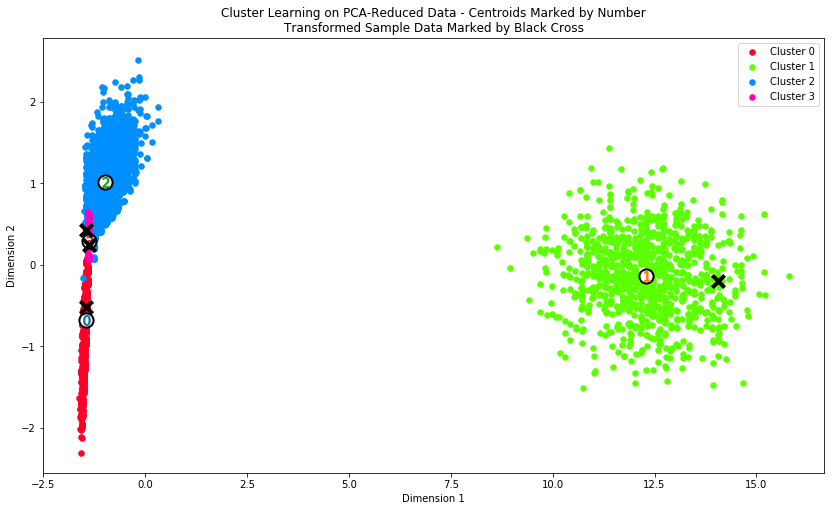

In [6]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(df)

# Transform the data using the PCA fit above
reduced_data = pca.transform(df)

# Transform samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

# Apply clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=4).fit(reduced_data)

#  Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

# Visualize the data
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# Print our cluster predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

We find some interesting results. Since the X's mark our sample data points, we can more clearly see how the clusters represent the data. The green cluster is very well defined off to the right as business customers. This is probably due to the significant difference in amount of purchases as well as which items are being purchased, which in reality would probably be the case. Over to the left, it is more difficult to differentiate between clusters. The red cluster seems well-defined as the Home Office customer segment, but the blue and pink clusters, which seem to correspond to enthusiast and gaming, respectively, are harder to differentiate. This is not a problem for us, though, since we are significantly reducing the complexity of our data and already have some good results: we accurately predicted each sample data point to be part of a different cluster, meaning that our clusters are doing a good job finding the customer segments. In practice, this technique would be very useful when applied to real data, although our results would most likely not be as clearcut.

IMPORTANT TO NOTE: Re-running the above cell will always produce slightly (or majorly) different results, either in color or position of clusters. This is because initially, the cluster centers are randomized and each color could end up anywhere. Sometimes, we end up splitting the "business" cluster into two clusters while splitting the left portion of the data into only one cluster. Also, we sometimes misclassify our sample data. This is a major challenge when using clustering: on a real dataset, we won't actually know where a customer 'belongs' without doing some manual research.

The next step is to fit a recommendation system to this data and try to predict that if a customer has bought a few items already, what would be the best item to recommend them next. Even if a customer is new to the site, we can still make a good recommendation based on what the most popular items are in the whole dataset. 

For the first stage, we compressed our data to 'sparse' format. Sparse just means lots of zeros, which our data matrix already has lots of.

In [7]:
data_sparse = sparse.csr_matrix(df.values)

In the following cell, we will train our Alternating Least Squares algorithm. This will take a few seconds, and would take a very long time on a very large dataset. We will talk more about how to handle bigger datasets later.

In [23]:
# Define implicit als algorithm
# Original Source: https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe
# Code modified to handle our data
def nonzeros(m, row):
    for index in range(m.indptr[row], m.indptr[row+1]):
        yield m.indices[index], m.data[index]
      
      
def implicit_als_cg(Cui, features=20, iterations=20, lambda_val=0.1):
    user_size, item_size = Cui.shape

    X = np.random.rand(user_size, features) * 0.01
    Y = np.random.rand(item_size, features) * 0.01

    Cui, Ciu = Cui.tocsr(), Cui.T.tocsr()

    for iteration in range(iterations):
        print('iteration %d of %d' % (iteration+1, iterations))
        least_squares_cg(Cui, X, Y, lambda_val)
        least_squares_cg(Ciu, Y, X, lambda_val)
    
    return sparse.csr_matrix(X), sparse.csr_matrix(Y)
  
  
def least_squares_cg(Cui, X, Y, lambda_val, cg_steps=3):
    users, features = X.shape

    YtY = Y.T.dot(Y) + lambda_val * np.eye(features)

    for u in range(users):

        x = X[u]
        r = -YtY.dot(x)

        for i, confidence in nonzeros(Cui, u):
            r += (confidence - (confidence - 1) * Y[i].dot(x)) * Y[i]

        p = r.copy()
        rsold = r.dot(r)

        for it in range(cg_steps):
            Ap = YtY.dot(p)
            for i, confidence in nonzeros(Cui, u):
                Ap += (confidence - 1) * Y[i].dot(p) * Y[i]

            alpha = rsold / p.dot(Ap)
            x += alpha * p
            r -= alpha * Ap

            rsnew = r.dot(r)
            p = r + (rsnew / rsold) * p
            rsold = rsnew

        X[u] = x

# Set training parameters and train on data
alpha_val = 15
conf_data = (data_sparse * alpha_val).astype('double')
user_vecs, item_vecs = implicit_als_cg(conf_data, iterations=20, features=20)

iteration 1 of 20
iteration 2 of 20
iteration 3 of 20
iteration 4 of 20
iteration 5 of 20
iteration 6 of 20
iteration 7 of 20
iteration 8 of 20
iteration 9 of 20
iteration 10 of 20
iteration 11 of 20
iteration 12 of 20
iteration 13 of 20
iteration 14 of 20
iteration 15 of 20
iteration 16 of 20
iteration 17 of 20
iteration 18 of 20
iteration 19 of 20
iteration 20 of 20


In [49]:
# Get sorted products for indexing data
products = sorted(products)

Now that our model is trained, we can make some predictions. Note that we did not split data into testing and training sets: we are simply observing how this algorithm might work in a simulated setting. If we were to implement the algorithm on Dell.com, we would want to test our algorithm first to see how well it can predict what unseen customers are interested in. However, the beauty of recommendation systems is that there isn't too much downside to "incorrectly" predicting what a customer is interested in since our goal is to simply make the customer aware of a certain item's availability.

Our first task will be to find items that are similar to a particular item of interest. For instance, let's check our items that are similar to one of Dell's most popular item, the XPS 13.

In [9]:
#------------------------------
# FIND SIMILAR ITEMS
#------------------------------

# Input product
product_of_interest = 'G3'
item_id = products.index(product_of_interest)
print("Items similar to {}".format(products[item_id]))

# Get the item row for item_id
item_vec = item_vecs[item_id].T

# Calculate the similarity score between item and other items
scores = item_vecs.dot(item_vec).toarray().reshape(1,-1)[0]
top_10 = np.argsort(scores)[::-1][:10]
item_lookup = products

items = []
items_scores = []

# Get and print the actual artists names and scores
for idx in top_10:
    items.append(products[idx])
    items_scores.append(scores[idx])

similar = pd.DataFrame({'item': items, 'score': items_scores})

print(similar)

Items similar to G3
                              item     score
0                               G3  0.111819
1                        XPS Tower  0.092033
2            Wyse 7030 Zero Client  0.085919
3                           XPS 15  0.085275
4                          Scanner  0.084258
5                    XPS 15 2-in-1  0.081221
6          Education Chromebook 11  0.080350
7                      OptiPlex XE  0.079457
8                               G7  0.078779
9  Precision Fixed 5000 All-in-one  0.076728


Very interesting results. We see many items that are indeed similar to the G3, however due to the randomness of our data, these results aren't perfect. On real data, we would inherently expect our results to be even more realistic, but this is a good start. Note that with our algorithm, items are usually similar to themselves, but sometimes they are not, so it is important to take a look at all of the top 10 scored items without ignoring the first.

Next, we will recommend items based on what a user has already purchased. This functionality is what we are most interested in.

In [89]:
# Load sample users
sample_user_ids = [3,5500,8100,9999]

In [90]:
# Let's recommend products for our sample users
# For instance, we will take a look at a 'gaming' customer
user_id = sample_user_ids[3]

#------------------------------
# GET ITEMS CONSUMED BY USER
#------------------------------

# Let's print out what the user has purchased
consumed_idx = list(data_sparse[user_id,:].nonzero()[1])
consumed_items = [item_lookup[i] for i in consumed_idx]
print("Customer with user_id {} purchased:".format(user_id))
print(consumed_items)


#------------------------------
# CREATE USER RECOMMENDATIONS
#------------------------------

def recommend(user_id, data_sparse, user_vecs, item_vecs, item_lookup, num_items=10):
    """Recommend items for a given user given a trained model
    
    Args:
        user_id (int): The id of the user we want to create recommendations for.
        
        data_sparse (csr_matrix): Our original training data.
        
        user_vecs (csr_matrix): The trained user x features vectors
        
        item_vecs (csr_matrix): The trained item x features vectors
        
        item_lookup (pandas.DataFrame): Used to map artist ids to artist names
        
        num_items (int): How many recommendations we want to return:
        
    Returns:
        recommendations (pandas.DataFrame): DataFrame with num_items artist names and scores
    
    """
  
    # Get all interactions by the user
    user_interactions = data_sparse[user_id,:].toarray()

    # We don't want to recommend items the user has consumed. So let's
    # set them all to 0 and the unknowns to 1.
    user_interactions = user_interactions.reshape(-1) + 1 #Reshape to turn into 1D array
    user_interactions[user_interactions > 1] = 0

    # This is where we calculate the recommendation by taking the 
    # dot-product of the user vectors with the item vectors.
    rec_vector = user_vecs[user_id,:].dot(item_vecs.T).toarray()

    # Let's scale our scores between 0 and 1 to make it all easier to interpret.
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    recommend_vector = user_interactions*rec_vector_scaled
   
    # Get all the artist indices in order of recommendations (descending) and
    # select only the top "num_items" items. 
    item_idx = np.argsort(recommend_vector)[::-1][:num_items]

    items = []
    scores = []

    # Loop through our recommended artist indicies and look up the actial artist name
    for idx in item_idx:
        items.append(item_lookup[idx])
        scores.append(recommend_vector[idx])

    # Create a new dataframe with recommended artist names and scores
    recommendations = pd.DataFrame({'items': items, 'score': scores})
    
    return recommendations

# Let's generate and print our recommendations
recommendations = recommend(user_id, data_sparse, user_vecs, item_vecs, item_lookup)
print()
print("Here are our recommendations for customer with user_id {}:".format(user_id))
print(recommendations)

Customer with user_id 9999 purchased:
['Alienware 34 Curved Gaming Monitor', 'Briefcase', 'G3']

Here are our recommendations for customer with user_id 9999:
                      items     score
0                  Backpack  0.745619
1   Inspiron Gaming Desktop  0.684899
2         Alienware headset  0.684445
3          UltraSharp 27 4K  0.683748
4           Alienware Mouse  0.676621
5                        G7  0.663440
6           Gaming Keyboard  0.656125
7              Alienware 15  0.654901
8  Visiontek Universal Dock  0.652539
9         Alienware Area-51  0.644498


Again, interesting results. Although our data is randomly generated, this result seems to make a lot of sense. By using a recommendation system, we are enabled to see connections in our data that we would not normally be able to make. Through making these connections, we not only are able to better understand our customer base, but we are also able to market more efficiency and raise brand reputation through personalized marketing.

### Thank you!

A note on big data:

On a very large dataset, we would need to use a different method to train our algorithm. There are methods to get around this! We could use PySpark, a package which integrates Spark and Hadoop with Python, allowing us to divide our data into many parts, train methods on multiple machines, and combine into a single, powerful model. PySpark has built in ALS systems, allowing us to train our model on large datasets.

In [105]:
# Next steps: Predicting best items for new customers... Real data?